In [1]:
from scipy.stats import wasserstein_distance
import os, ot
os.chdir('../')
from root_dir import * 
import pandas as pd
import numpy as np
from functools import partial

In [2]:
seed = 123
np.random.seed(seed)
file_path = '%s/privateDemographics/data/toy/%s_outlierflag.csv' % (root_dir, 'train')
csv_df = pd.read_csv(file_path)
drop_idx = np.random.choice(csv_df[(csv_df.a == 2) & (csv_df.y == 1)].index, size = 16, replace = False)
csv_df = csv_df.drop(index = drop_idx).reset_index(drop = True)
df = [csv_df[csv_df.y == 0].reset_index(drop = True), csv_df[csv_df.y == 1].reset_index(drop = True)]
regular_set = [df[0][df[0].a <= 1].index, df[1][df[1].a <= 1].index]
outlier_set = [df[0][df[0].a == 2].index, df[1][df[1].a == 2].index]
n_regular, n_outlier = np.array([len(regular_set[0]), len(regular_set[1])]), np.array([len(outlier_set[0]), len(outlier_set[1])])
n = n_regular + n_outlier
orig_data = [df[0][['x1', 'x2', 'y']].values, df[1][['x1', 'x2', 'y']].values]
orig_weight = [np.ones((n[0],))/n[0], np.ones((n[1],))/n[1]]


# Sliced Wasserstein distance

## y = 0

In [3]:
y = 0

In [4]:
plot_regular = {1: 0}
for weight in np.arange(1.25, 5, .25):
    dist = np.zeros(n_regular[y])
    for i, idx in enumerate(regular_set[y]):
        new_weight = np.ones((n[y],))
        new_weight[idx] = weight
        new_weight = new_weight / new_weight.sum()
        dist[i] = ot.sliced_wasserstein_distance(orig_data[y], orig_data[y], orig_weight[y], new_weight, seed=seed)
    plot_regular[weight] = dist.mean()

In [5]:
plot_outlier = {1: 0}
for weight in np.arange(1.25, 5, .25):
    dist = np.zeros(n_outlier[y])
    for i, idx in enumerate(outlier_set[y]):
        new_weight = np.ones((n[y],))
        new_weight[idx] = weight
        new_weight = new_weight / new_weight.sum()
        dist[i] = ot.sliced_wasserstein_distance(orig_data[y], orig_data[y], orig_weight[y], new_weight, seed=seed)
    plot_outlier[weight] = dist.mean()

In [6]:
plot = pd.DataFrame([pd.Series(plot_regular), pd.Series(plot_outlier)]).T
plot = plot.reset_index()
plot.columns = ['weight','regular', 'outlier']

Text(0, 0.5, 'Sliced Wasserstein Distance')

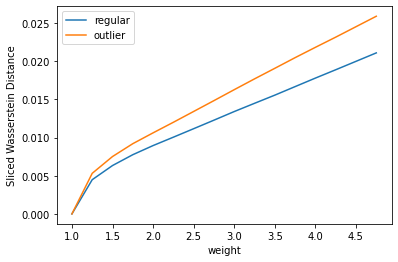

In [7]:
ax = plot.plot('weight', 'regular')
plot.plot('weight', 'outlier', ax = ax)
ax.set_ylabel('Sliced Wasserstein Distance')

# 1-Wasserstein Distance

In [8]:
y = 0

In [9]:
np.random.seed(seed)
plot1_regular = {1: 0}
for weight in np.arange(1.25, 5, .25):
    dist = np.zeros(n_regular[y])
    for i, idx in enumerate(regular_set[y]):
        new_weight = np.ones((n[y],))
        new_weight[idx] = weight
        new_weight = new_weight / new_weight.sum()
        M = ot.dist(orig_data[y], orig_data[y])
        # new_data = orig_data[np.random.choice(np.arange(n), n, p = new_weight)]
        dist[i] = ot.emd2(orig_weight[y], new_weight, M)
    plot1_regular[weight] = dist.mean()
    
plot1_outlier = {1: 0}
for weight in np.arange(1.25, 5, .25):
    dist = np.zeros(n_outlier[y])
    for i, idx in enumerate(outlier_set[y]):
        new_weight = np.ones((n[y],))
        new_weight[idx] = weight
        new_weight = new_weight / new_weight.sum()
        M = ot.dist(orig_data[y], orig_data[y])
        # new_data = orig_data[np.random.choice(np.arange(n), n, p = new_weight)]
        dist[i] = ot.emd2(orig_weight[y], new_weight, M)
    plot1_outlier[weight] = dist.mean()
    
plot1 = pd.DataFrame([pd.Series(plot1_regular), pd.Series(plot1_outlier)]).T
plot1 = plot1.reset_index()
plot1.columns = ['weight','regular', 'outlier']

Text(0, 0.5, '1-Wasserstein Distance')

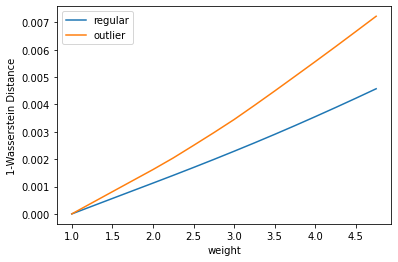

In [10]:
plot1.to_csv('%s/privateDemographics/results/toy/outliers/W1ball_feature_y_%d.csv' % (root_dir, y)) 
ax = plot1.plot('weight', 'regular')
plot1.plot('weight', 'outlier', ax = ax)
ax.set_ylabel('1-Wasserstein Distance')

In [11]:
y = 1

In [12]:
np.random.seed(seed)
plot1_regular = {1: 0}
for weight in np.arange(1.25, 5, .25):
    dist = np.zeros(n_regular[y])
    for i, idx in enumerate(regular_set[y]):
        new_weight = np.ones((n[y],))
        new_weight[idx] = weight
        new_weight = new_weight / new_weight.sum()
        M = ot.dist(orig_data[y], orig_data[y])
        # new_data = orig_data[np.random.choice(np.arange(n), n, p = new_weight)]
        dist[i] = ot.emd2(orig_weight[y], new_weight, M)
    plot1_regular[weight] = dist.mean()
    
plot1_outlier = {1: 0}
for weight in np.arange(1.25, 5, .25):
    dist = np.zeros(n_outlier[y])
    for i, idx in enumerate(outlier_set[y]):
        new_weight = np.ones((n[y],))
        new_weight[idx] = weight
        new_weight = new_weight / new_weight.sum()
        M = ot.dist(orig_data[y], orig_data[y])
        # new_data = orig_data[np.random.choice(np.arange(n), n, p = new_weight)]
        dist[i] = ot.emd2(orig_weight[y], new_weight, M)
    plot1_outlier[weight] = dist.mean()
    
plot1 = pd.DataFrame([pd.Series(plot1_regular), pd.Series(plot1_outlier)]).T
plot1 = plot1.reset_index()
plot1.columns = ['weight','regular', 'outlier']

Text(0, 0.5, '1-Wasserstein Distance')

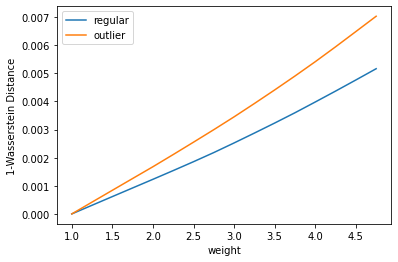

In [13]:
plot1.to_csv('%s/privateDemographics/results/toy/outliers/W1ball_feature_y_%d.csv' % (root_dir, y)) 
ax = plot1.plot('weight', 'regular')
plot1.plot('weight', 'outlier', ax = ax)
ax.set_ylabel('1-Wasserstein Distance')

# 2-Wasserstein Distance

In [14]:
y = 0

In [15]:
np.random.seed(seed)
plot2_regular = {1: 0}
for weight in np.arange(1.25, 5, .25):
    dist = np.zeros(n_regular[y])
    for i, idx in enumerate(regular_set[y]):
        new_weight = np.ones((n[y],))
        new_weight[idx] = weight
        new_weight = new_weight / new_weight.sum()
        M = ot.dist(orig_data[y], orig_data[y])**2
        # new_data = orig_data[np.random.choice(np.arange(n), n, p = new_weight)]
        dist[i] = ot.emd2(orig_weight[y], new_weight, M)
    plot2_regular[weight] = dist.mean()
    
plot2_outlier = {1: 0}
for weight in np.arange(1.25, 5, .25):
    dist = np.zeros(n_outlier[y])
    for i, idx in enumerate(outlier_set[y]):
        new_weight = np.ones((n[y],))
        new_weight[idx] = weight
        new_weight = new_weight / new_weight.sum()
        M = ot.dist(orig_data[y], orig_data[y])**2
        # new_data = orig_data[np.random.choice(np.arange(n), n, p = new_weight)]
        dist[i] = ot.emd2(orig_weight[y], new_weight, M)
    plot2_outlier[weight] = dist.mean()
    
plot2 = pd.DataFrame([pd.Series(plot2_regular), pd.Series(plot2_outlier)]).T
plot2 = plot2.reset_index()
plot2.columns = ['weight','regular', 'outlier']

In [16]:
plot2.regular = plot2.regular**.5
plot2.outlier = plot2.outlier**.5

Text(0, 0.5, '2-Wasserstein Distance')

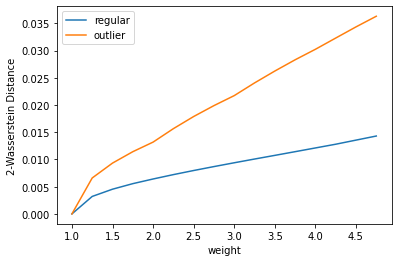

In [17]:
plot2.to_csv('%s/privateDemographics/results/toy/outliers/W2ball_feature_y_%d.csv' % (root_dir, y)) 
ax = plot2.plot('weight', 'regular')
plot2.plot('weight', 'outlier', ax = ax)
ax.set_ylabel('2-Wasserstein Distance')

In [18]:
y = 1

In [19]:
np.random.seed(seed)
plot2_regular = {1: 0}
for weight in np.arange(1.25, 5, .25):
    dist = np.zeros(n_regular[y])
    for i, idx in enumerate(regular_set[y]):
        new_weight = np.ones((n[y],))
        new_weight[idx] = weight
        new_weight = new_weight / new_weight.sum()
        M = ot.dist(orig_data[y], orig_data[y])**2
        # new_data = orig_data[np.random.choice(np.arange(n), n, p = new_weight)]
        dist[i] = ot.emd2(orig_weight[y], new_weight, M)
    plot2_regular[weight] = dist.mean()
    
plot2_outlier = {1: 0}
for weight in np.arange(1.25, 5, .25):
    dist = np.zeros(n_outlier[y])
    for i, idx in enumerate(outlier_set[y]):
        new_weight = np.ones((n[y],))
        new_weight[idx] = weight
        new_weight = new_weight / new_weight.sum()
        M = ot.dist(orig_data[y], orig_data[y])**2
        # new_data = orig_data[np.random.choice(np.arange(n), n, p = new_weight)]
        dist[i] = ot.emd2(orig_weight[y], new_weight, M)
    plot2_outlier[weight] = dist.mean()
    
plot2 = pd.DataFrame([pd.Series(plot2_regular), pd.Series(plot2_outlier)]).T
plot2 = plot2.reset_index()
plot2.columns = ['weight','regular', 'outlier']

In [20]:
plot2.regular = plot2.regular**.5
plot2.outlier = plot2.outlier**.5

Text(0, 0.5, '2-Wasserstein Distance')

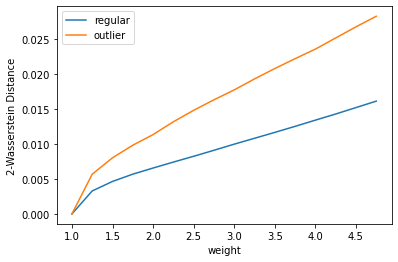

In [21]:
plot2.to_csv('%s/privateDemographics/results/toy/outliers/W2ball_feature_y_%d.csv' % (root_dir, y)) 
ax = plot2.plot('weight', 'regular')
plot2.plot('weight', 'outlier', ax = ax)
ax.set_ylabel('2-Wasserstein Distance')

# Comparison to Gradient Space

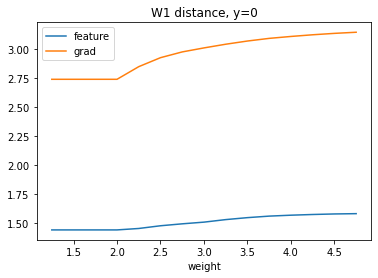

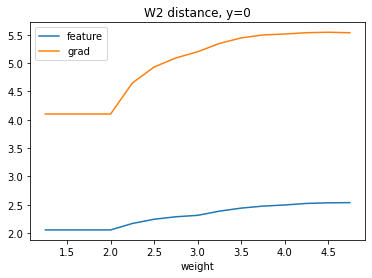

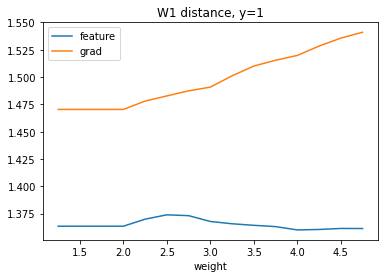

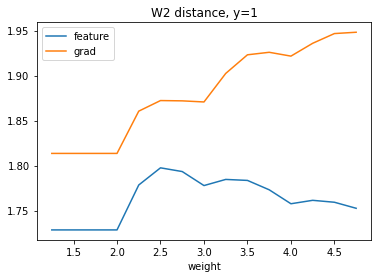

In [22]:
for y in [0,1]:
    for w in [1,2]:
        plot_feature = pd.read_csv('%s/privateDemographics/results/toy/outliers/W%dball_feature_y_%d.csv' % (root_dir, w, y)) 
        plot_grad = pd.read_csv('%s/privateDemographics/results/toy/outliers/W%dball_grad_y_%d.csv' % (root_dir, w, y)) 

        plot = pd.DataFrame({
            'weight': plot_grad.weight, 
            'feature': plot_feature.outlier / plot_feature.regular, 
            'grad': plot_grad.outlier / plot_grad.regular, 
        })

        ax = plot.plot('weight', 'feature')
        plot.plot('weight', 'grad', ax = ax)
        ax.set_title('W%d distance, y=%d' % (w, y))